# Language Identification Classification Hackathon
© Explore Data Science Academy

### Honour Code

I **Thembi Chauke**, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

## Overview

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages. From South African Government.

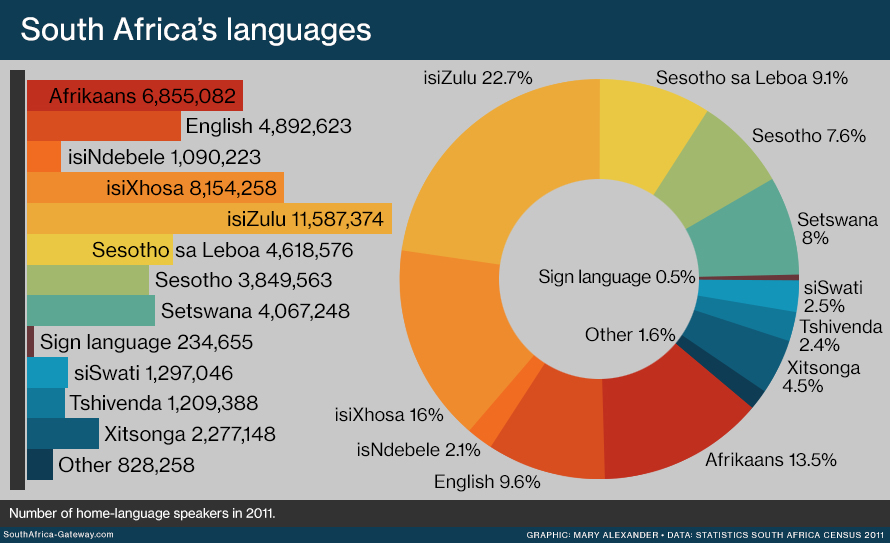

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

## 1. Importing Packages 

Importing all the packages and libraries needed for  feature cleaning, data visualization, analysis and modelling.

In [57]:
# Importing libraries
import pandas as pd
import numpy as np
import re
import string
special = string.punctuation 

# nltk
import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.porter import *
# modelling
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
additional = ['is']
stop = set().union(stopwords.words('english'),additional)


import warnings 
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MaxwellM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MaxwellM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 2. Loading the data


In [58]:
# Load the train dataset
df_train = pd.read_csv("train_set.csv")
# Load the test datase
df_test = pd.read_csv("test_set.csv")

## 3. Reviewing the data

In [59]:
# displays the first five rows of the train data
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [60]:
# displays the first five rows of the tdata
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [61]:
# Getting information such as column name, data types, size andmemory usage
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


The are two columns, the language id and the text column with 33000 non-null values with a string data type. 

#### Missing values

In [62]:
 # calculates the total number of rows in a pandas DataFrame (df) that contain at least one missing value (NaN or null value)
np.sum(df_train.isnull().any(axis=1))

0

In [63]:
# calculates the total number of rows in a pandas Da that contain at least one missing value (NaN or null value)
np.sum(df_train.isnull().any(axis=1))

0

The output is zero to illustrate the data has no missing values.

#### Unique classes in the data

In [64]:
# To view the unique values in language id feature
df_train['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

The are eleven different languages in the dataset.

In [65]:
# To get the count of each unique value in the 'language id' column
df_train['lang_id'].value_counts()

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

#### Duplicate rows

In [66]:
#Now we check for any duplicates in our train data 
print("Duplicate Rows except first occurrence based on all columns are :")

#count any duplicate rows for each column
print(df_train[df_train.duplicated()].count())

#Now we check for any duplicates in our test data 
print("\nDuplicate Rows except first occurrence based on all columns are :")

#count any duplicate rows for each column
print(df_test[df_test.duplicated()].count())

Duplicate Rows except first occurrence based on all columns are :
lang_id    3052
text       3052
dtype: int64

Duplicate Rows except first occurrence based on all columns are :
index    0
text     0
dtype: int64


In [67]:
# displaying how the text looks like before cleaning it
df_train.text

0        umgaqo-siseko wenza amalungiselelo kumaziko ax...
1        i-dha iya kuba nobulumko bokubeka umsebenzi na...
2        the province of kwazulu-natal department of tr...
3        o netefatša gore o ba file dilo ka moka tše le...
4        khomishini ya ndinganyiso ya mbeu yo ewa maana...
                               ...                        
32995    popo ya dipolateforomo tse ke go tlisa boetele...
32996    modise mosadi na o ntse o sa utlwe hore thaban...
32997    closing date for the submission of completed t...
32998    nawuphina umntu ofunyenwe enetyala phantsi kwa...
32999    mafapha a mang le ona a lokela ho etsa ditlale...
Name: text, Length: 33000, dtype: object

## 4. Data cleaning

### Tokenization

In [68]:
#tokenize
def rem2(text) : 
    tknzr = TweetTokenizer(strip_handles=True)
    text = text.lower()
    text = ' '.join(tknzr.tokenize(text))
    return (text)

### Removing url's

In [69]:
# remove URLs
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

In [70]:
# remove htmls
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

### Removing punctuations

In [71]:
# remove punct
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

In [72]:
# remove other characters
def remove_other (text) : 
    text = text.lower()
    text = text.replace("'", "")
    text = text.replace("  ", " ")
    text = text.replace("   ", " ")
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return(text)

### Stemming

In [73]:
# function to stemm the text
def stemming (text) : 
    stemmer = nltk.stem.PorterStemmer()
    return(" ".join(stemmer.stem(word) for word in text.split()))

### Lemmatization

In [74]:
# function to lemm a text 
def lemming (text) : 
    lemmatizer=nltk.stem.WordNetLemmatizer()
    return(" ".join(lemmatizer.lemmatize(word) for word in text.split()))

### Combination of functions

In [75]:
# Full clean ... combination off all the previous functions
def Full_clean (text) :
    text = remove_html(text)
    text = remove_URL(text)
    text = remove_punct(text)
    text = remove_other(text)
    text = rem2(text)
    text = lemming(text)
    #text = stemming(text)
    return(text)

In [76]:
#full clean
#Clean the original test data
df_test['clean_text'] = df_test['text'].apply(lambda x: Full_clean(x))
#Clean the original train data
df_train['clean_text'] = df_train['text'].apply(lambda x: Full_clean(x)) 
df_train

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqosiseko wenza amalungiselelo kumaziko axh...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,idha iya kuba nobulumko bokubeka umsebenzi nap...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulunatal department of tra...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...
...,...,...,...
32995,tsn,popo ya dipolateforomo tse ke go tlisa boetele...,popo ya dipolateforomo tse ke go tlisa boetele...
32996,sot,modise mosadi na o ntse o sa utlwe hore thaban...,modise mosadi na o ntse o sa utlwe hore thaban...
32997,eng,closing date for the submission of completed t...,closing date for the submission of completed t...
32998,xho,nawuphina umntu ofunyenwe enetyala phantsi kwa...,nawuphina umntu ofunyenwe enetyala phantsi kwa...


## 5. Split the dataset

In [77]:
X_train, X_test, y_train, y_test = train_test_split(df_train['clean_text'],df_train['lang_id'],test_size = 0.1,random_state=0)

print("X_train shape : ", X_train.shape)
print("X_test shape : ", X_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)

X_train shape :  (29700,)
X_test shape :  (3300,)
y_train shape :  (29700,)
y_test shape :  (3300,)


In [78]:
# Transforming the Dataset Using TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)

# Fitting the Vectorizer to the Training Data
vectoriser.fit(X_train) 

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [79]:
 # applies the transformation to the training data, 'X_train'
X_train_vect = vectoriser.transform(X_train)
# applies the transformation to the testing data, 'X_test'
X_test_vect = vectoriser.transform(X_test)

In [80]:
# applies the transformation to the 'text' column for the test dataset
test_X = vectoriser.transform(df_test.clean_text)

## 6. Modelling

#### Support Vector Classifier (SVCs)

A Support Vector Classifier(SVC) model works by finding the most optimal way possible in order to seperate classes by considering the closest point on either side of the boundary. The boundary can either be linear or non-linear depending on the task at hand.

In [53]:
# create a support vector model
SVC_model = SVC(kernel="linear", C=1.0, gamma=0.1)
# fit model into training data
SVC_model.fit(X_train_vect, y_train)
# predict on the test data
pred_svc = SVC_model.predict(X_test_vect)

In [54]:
print('Classification Report')
print(classification_report(y_test, pred_svc, target_names=['afr', 'eng', 'nbl', 'nso','sot','ssw','tsn','tso','ven','xho','zul']))

Classification Report
              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       300
         eng       0.99      1.00      1.00       272
         nbl       1.00      0.99      0.99       312
         nso       1.00      1.00      1.00       277
         sot       1.00      0.99      1.00       299
         ssw       1.00      1.00      1.00       320
         tsn       1.00      1.00      1.00       295
         tso       1.00      1.00      1.00       299
         ven       1.00      1.00      1.00       306
         xho       1.00      0.99      1.00       308
         zul       0.98      0.99      0.99       312

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



#### Naive Bayes classifier

Naive Bayes classifiers are a family of linear "probabilistic classifiers" based on applying Bayes' theorem with strong independence assumptions between the features

In [81]:
# create a naive bayes model
NB = Pipeline([('tfidf', TfidfVectorizer(stop_words= list(stop),analyzer='char',ngram_range=(5,5))),
               ('clf', MultinomialNB())])

# fit model into training data
NB = NB.fit(X_train, y_train)
# predict on the test data
NB_predict = NB.predict(X_test) 
NB_accuracy = f1_score(y_test,NB_predict, average='weighted')
print("\nClassification report: \n" ,classification_report(NB_predict,y_test))


Classification report: 
               precision    recall  f1-score   support

         afr       1.00      1.00      1.00       300
         eng       1.00      1.00      1.00       272
         nbl       1.00      1.00      1.00       312
         nso       1.00      1.00      1.00       277
         sot       1.00      1.00      1.00       299
         ssw       1.00      1.00      1.00       320
         tsn       1.00      1.00      1.00       295
         tso       1.00      1.00      1.00       299
         ven       1.00      1.00      1.00       306
         xho       1.00      1.00      1.00       308
         zul       1.00      1.00      1.00       312

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



## Kaggle submission

In [83]:
# Naive bayes
#test dataset
X_test_data = df_test['clean_text']


test_pred = NB.predict(X_test_data)

#store the predicted language id into the predefined column
df_test['lang_id'] = test_pred 

#define my dataframe called submission with two columns of index language id
submission = df_test[['index','lang_id']]
# writing data to a CSV file
submission.to_csv('Kaggle_submission.csv', index=False) 
submission

,index,lang_id
0,1,tsn
1,2,nbl
2,3,ven
3,4,ssw
4,5,afr
...,...,...
5677,5678,eng
5678,5679,nso
5679,5680,sot
5680,5681,sot
